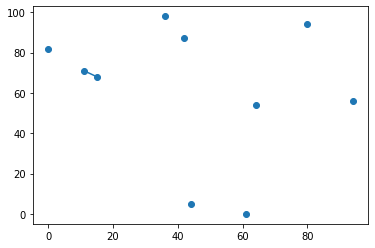

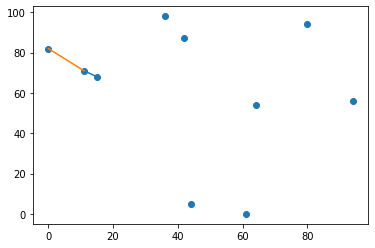

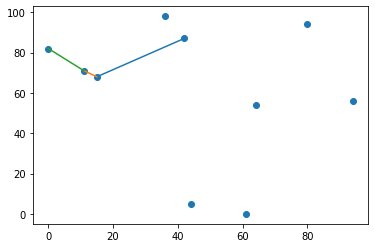

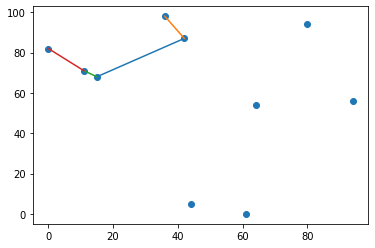

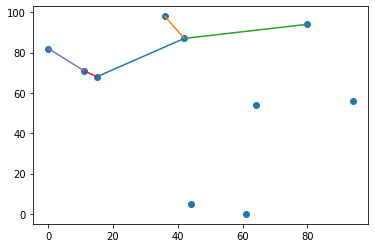

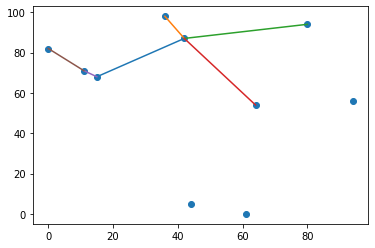

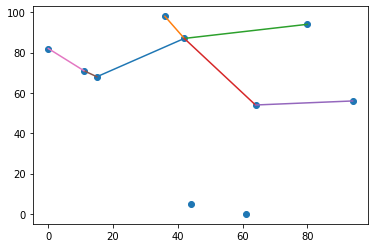

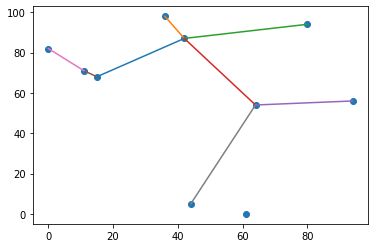

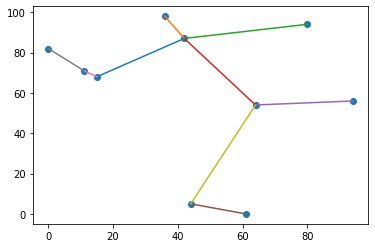

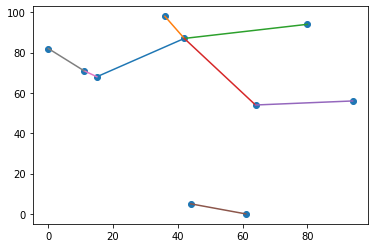

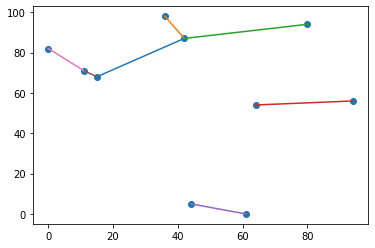

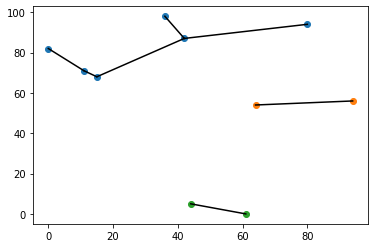

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time


def dist(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


def calc_weight():
    weights = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            weights[i][j] = dist(points[i], points[j])
    return weights


def generate_points():
    for i in range(n):
        x = np.random.randint(0, 100)
        y = np.random.randint(0, 100)
        points.append((x, y))


def link():
    min = np.inf
    i_min, j_min = -1, -1
    for i in range(n):
        if connections[i][i] == -1:
            for j in range(n):
                if connections[j][j] != -1:
                    if min > weights[i][j]:
                        min = weights[i][j]
                        i_min, j_min = i, j
    connections[i_min][j_min] = connections[j_min][i_min] = min
    connections[j_min][j_min] = -1


def find_min_dist():
    min = np.inf
    i_min, j_min = -1, -1
    for i in range(n):
        for j in range(i + 1, n):
            if min > weights[i][j]:
                min = weights[i][j]
                i_min, j_min = i, j
    connections[i_min][j_min] = connections[j_min][i_min] = min
    connections[i_min][i_min] = connections[j_min][j_min] = -1


def remove_link():
    max = -1
    i_max, j_max = -1, -1
    for i in range(n):
        for j in range(i + 1, n):
            if max < connections[i][j]:
                max = connections[i][j]
                i_max, j_max = i, j
    connections[i_max][j_max] = connections[j_max][i_max] = 0


def clusterize():
    all = list(range(n))
    clusters = []
    while len(all) > 0:
        local = [all.pop()]
        for i in local:
            for j in all.copy():
                if connections[i][j] != 0:
                    local.append(j)
                    all.remove(j)
        clusters.append(local)
    return clusters


if __name__ == '__main__':
    n = 10
    c = 3
    points = []
    generate_points()
    weights = calc_weight()
    connections = np.zeros((n, n))
    find_min_dist()
    for k in range(n - 1):
        for i in range(n):
            for j in range(i + 1, n):
                if connections[i][j] > 0:
                    plt.plot((points[i][0], points[j][0]),
                             (points[i][1], points[j][1]))
        link()
        plt.scatter([i[0] for i in points], [i[1] for i in points])
        plt.show()
    for k in range(c - 1):
        remove_link()
        for i in range(n):
            for j in range(i + 1, n):
                if connections[i][j] > 0:
                    plt.plot((points[i][0], points[j][0]),
                             (points[i][1], points[j][1]))
        plt.scatter([i[0] for i in points], [i[1] for i in points])
        plt.show()
    plt.show()
    clusters = clusterize()

    for cluster_index, cluster in enumerate(clusters):
        plt.scatter([points[i][0] for i in cluster], [points[i][1] for i in cluster])

    for i in range(n):
        for j in range(i + 1, n):
            if connections[i][j] > 0:
                plt.plot((points[i][0], points[j][0]),
                         (points[i][1], points[j][1]), color='black')
    plt.show()